# Handwritten Digit Recognition

# 1.Importing Packages

In [332]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 2.Importing The Data

In [334]:
x_train = np.loadtxt("train_x.csv" , delimiter = ",").T
y_train = np.loadtxt("train_label.csv" , delimiter = ",").T
x_test = np.loadtxt("test_x.csv" , delimiter = ",").T
y_test = np.loadtxt("test_label.csv" , delimiter = ",").T

In [335]:
#1000 REPRESENTS DATA OR OBSERVATIONS IN TRAIN DATASET WE HAVE(M)
#784 IS THE SIZE OF IMAGE (28 X 28), REPRESENTS INPUT FEATURES(N)
#350 NUMBER OF OBSERVATIONS IN TEST DATASET 
#10 REPRESENTS HARD CODING IN TRAIN LABEL DATASET, 1 IN 0TH POSITION, 1 IN IST POSITION AND SO ON...
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(784, 1000)
(10, 1000)
(784, 350)
(10, 350)


# 3.Display Image From The Data

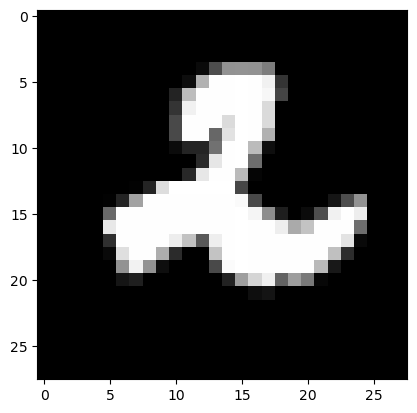

In [337]:
index = random.randrange(0 , x_train.shape[0])
plt.imshow(x_train[: , index].reshape(28 , 28) , cmap = "gray")
plt.show()

# 4.Creating Model


In [339]:
# CREATING ACTIVATION FUNCTIONS

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x , 0)

def softmax(x):
    expx = np.exp(x)
    return expx/np.sum(expx , axis =0)

In [340]:
# FINDING DERIVATIVES OF THESE FUNCTIONS

# Derivative is (1-a*2) for tanh
def derivativetanh(x):
    return (1 - np.power(x , 2))
def derivativerelu(x):
    return np.array(x >0 , dtype = np.float32)


# 5.Initializing The Parameters

In [342]:
# INITIALIZING THE PARAMETERS

def initializeparameters(n_x , n_h , n_y):
    w1 = np.random.randn(n_h , n_x)*0.01
    b1 = np.zeros((n_h , 1))

    w2 = np.random.randn(n_y , n_h)*0.01
    b2 = np.zeros((n_y , 1))

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    return parameters

# 6.Implementing Forward Propogation

In [344]:
def forwardpropagation(x , parameters):
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]

    # Z1 = W1*X +B1 
    # Z2 = W2*A1+B2
    # A1 = f(Z1)  
    #  A2 = f(Z2)
    
    z1 = np.dot(w1 , x) + b1
    a1 = relu(z1)

    z2 = np.dot(w2 , a1) + b2
    a2 = softmax(z2)

    forwardcache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    return forwardcache

# 7.Implementing Cost Function

In [346]:
# Cost Function for MultiClass Classification : -(1/m)summation(m)summation(n)[y * log(a)]

def costfunction(a2 , y):
    m = y.shape[1]
    cost = -(1/m)*np.sum(y*np.log(a2))
    #cost = -(1/m)*np.sum(np.sum(y*np.log(a2 , 0) , 1))
    return cost

# 8.Implementing Backpropogation

In [354]:
# Output Layer
# dZ2 = (A2 -Y)
# dW2 = 1/m.dZ2.A1.T
# dB2 = 1/m.sum(dZ2,1)
# Hidden Layer
# dZ1 = W2.T.dZ2*f1(Z1)
# dW1 = 1/m.dZ1.X.T
# dB1 = 1/m.sum(dZ1,1)
def backwardpropogation(x , y , parameters , forwardcache):
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"] 

    a1 = forwardcache["a1"]
    a2 = forwardcache["a2"]

    m = x.shape[1]

    dz2 = (a2 -y) 
    dw2 = (1/m)*np.dot(dz2 , a1.T)
    db2 = (1/m)*np.sum(dz2 , axis = 1 , keepdims = True)

    dz1 = (1/m)*np.dot(w2.T , dz2)*derivativerelu(a1)
    dw1 = (1/m)*np.dot(dz1 , x.T)
    db1 = (1/m)*np.sum(dz1 , axis = 1 , keepdims = True)

    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dz1" : dz1,
        "dw2" : dw2,
        "db2" : db2,
        "dz2" : dz2
    }
    return gradients

# 9. Update Parameters

In [364]:
def updateparameters(parameters , gradients , learningrate):
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]

    dw1 = gradients["dw1"]
    db1 = gradients["db1"]
    dw2 = gradients["dw2"]
    db2 = gradients["db2"]

    w1 = w1 -learningrate*dw1
    b1 = b1 -learningrate*db1
    w2 = w2 -learningrate*dw2
    b2 = b2 -learningrate*db2

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    return parameters

# 10.The Complete Model Implementation

In [400]:
def model(x , y , n_h , learningrate , iterations):
    n_x = x.shape[0]
    n_y = y.shape[0]
    costlist = []

    parameters = initializeparameters(n_x , n_h , n_y)

    for i in range(iterations):

        forwardcache = forwardpropagation(x , parameters)
        cost = costfunction(forwardcache["a2"] , y)
        gradients = backwardpropogation(x , y , parameters , forwardcache)
        parameters = updateparameters(parameters , gradients , learningrate)
        costlist.append(cost)

        if(i%(iterations/10) == 0):
            print("cost after" , i , "iterations is : " , cost)


    return parameters , costlist

In [465]:
iterations = 100
n_h = 1000
learningrate = 0.002
Parameters , Costlist= model(x_train , y_train , n_h = n_h , learningrate = learningrate , iterations = iterations)

cost after 0 iterations is :  9.185474994943409
cost after 10 iterations is :  26.168115734485493
cost after 20 iterations is :  1.9866076020957557
cost after 30 iterations is :  0.8729872072246682
cost after 40 iterations is :  0.35074134627114845
cost after 50 iterations is :  0.20304405406332854
cost after 60 iterations is :  1.826214091921799
cost after 70 iterations is :  0.10577006270780817
cost after 80 iterations is :  0.0664667308326938
cost after 90 iterations is :  0.03909722706924365


# Plotting the cost error

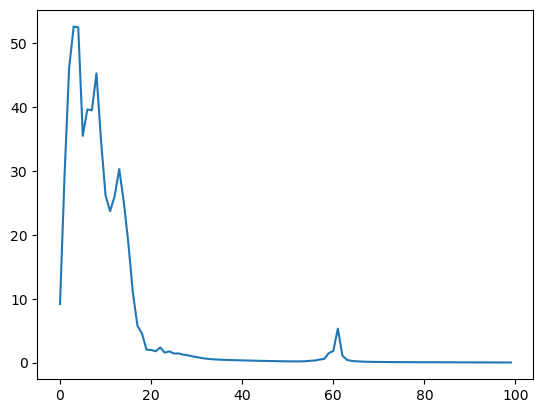

In [467]:
t = np.arange(0 , iterations)
plt.plot(t , Costlist)
plt.show()

# Checking Accuracy

In [469]:
def accuracy(inp , labels , parameters):
    forwardcache = forwardpropagation(inp , parameters)
    aout = forwardcache["a2"]

    aout = np.argmax(aout , 0)
    
    yout = np.argmax(labels , 0)    
    aout == yout 

    acc = np.mean(aout == yout)*100
    return acc

In [471]:
print("Accuracy of Train Dataset is : " , accuracy(x_train , y_train , Parameters) , "%")
print("Accuracy of Test Dataset is : " , accuracy(x_test , y_test , Parameters) , "%")

Accuracy of Train Dataset is :  99.8 %
Accuracy of Test Dataset is :  87.14285714285714 %


# Making Predictions

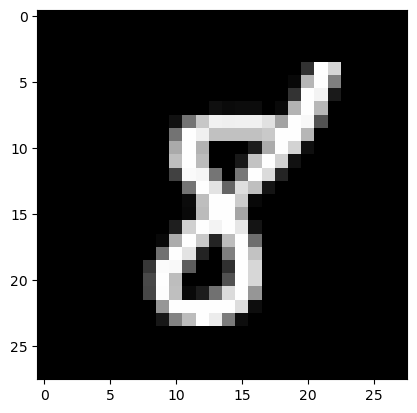

Our Model Says It Is :  8


In [488]:
idx = random.randrange(0 , x_test.shape[1])
plt.imshow(x_test[: , idx].reshape(28 , 28) , cmap = "gray")
plt.show()

forwardcache = forwardpropagation(x_test[: , idx].reshape(x_test.shape[0] , 1) , Parameters)
aout = forwardcache["a2"]
aout = np.argmax(aout , 0)
print("Our Model Says It Is : " , aout[0])